<a href="https://colab.research.google.com/github/Sebastian2658/AED_DS_Salary/blob/main/rnn_basico_keras_algebraico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Modelo de RNN muchos a uno

Este es un modelo de RNN de muchos a uno; que tiene tres entradas y una predicción de salida que tiene como función de activación la función espejo, f(x)=x.

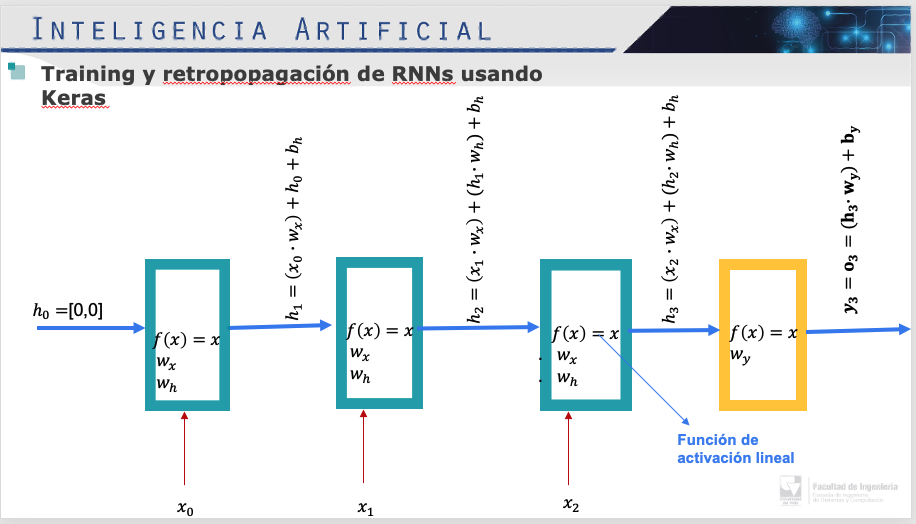

# Instalar [tensorflow](https://www.tensorflow.org)

Es un framework de código libre para Machine Learning (ML) desarollada por Google, es la multiplataforma en la cual de basa Keras. Tensorflow fue desarrollado para dar soporte principalmente  al desarrollo de las redes neuronales artifiales.

In [ ]:
pip install --upgrade tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.8/489.8 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 52.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 47.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 37.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 64.2 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.15.0
    Uninstalling wrapt-1.15.0:
      Successfully uninstalled wrapt-1.15.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.13.0
    Uninstalling tensorflow-estimator-2.13.0:
      Successfully uninstalled tensorflow-estimator-2.13.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.3.1
    Uninstalling ml-dtypes-0.3.1:
      Successfully uninstalled ml-dtypes-0

# Declaración de librerías y uso de [Keras](https://keras.io)

1) Keras es una biblioteca de redes neuronales para  código abierto  escrita en Python. De igual manera se declara sklearn que es una librería gratutita escrita en Python para data science.

2)  NumPy es otra librería la cual  sirve para los cálculos numéricos de grandes estructuras matriciales.

3) Matplotlib, esta es una librería de python especializada esn gráficos complejos de dos dimensiones. Importante tener en cuenta que Keras funciona sobre tensorflow.



In [ ]:
import numpy as np
import pandas as pd
from IPython.display import Image
#Image(filename='cinco.png')

In [ ]:

from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt

# Creación básica de la RNN con keras.layers.SimpleRNN

La siguiente función que crea  un objeto model  para una red neuronal recurrente básica:

1) Sequential(), Apila un simple conjunto  de capas donde cada capa tiene exactamente un tensor de entrada y un tensor de salida  

2) SimpleRNN, adiciona al modelo secuencial un RNN totalmente conectado donde la salida del paso de tiempo anterior se alimentará al siguiente paso de tiempo.

3) Dense, asegura la conexión y es la  capa regular de red neuronal profundamente conectada. El resultado es la salida y se pasará a la siguiente capa. La capa densa realiza la siguiente operación en la entrada y devuelve la salida.

output= activation(dot(input,kernel) + bias)

input,  representa los datos de entrada

kernel, representa los datos de peso

dot, representa el producto de punto numpy de toda la entrada y sus pesos correspondientes
  
bias, representa un valor sesgado utilizado en el aprendizaje automático para optimizar el modelo

activation, representa la función de activación.




4) El modelo se compila para completar el modelo y hacerlo listo para su uso, aquí necesitamos especificar un optimizador y una función de pérdida. Podemos compilar un modelo usando el atributo de compile.   





In [ ]:
def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    model.add(SimpleRNN(hidden_units, input_shape=input_shape,
                        activation=activation[0]))
    model.add(Dense(units=dense_units, activation=activation[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

demo_model = create_RNN(2, 1, (3,1), activation=['linear', 'linear'])

# Asignación de  dimensiones  con get_weights

En esta parte se le asignalas domensiones a las matrices de contexto de las entradas y salidas de la RNN. Prácticamente se granatiza que conjunto de pesos es usada por las capas. Ahora se  definen los pesos de las matrices al azar.


In [ ]:
# wx los pesos de  la matriz de entrada
# wh matriz de pesos de las unidades ocultas h
# wy matriz de pesos de la capa densa o predicción
# get_weights garantizala la mlista de  pesos utilizados en la capa.
wx = demo_model.get_weights()[0]
wh = demo_model.get_weights()[1]
bh = demo_model.get_weights()[2]
wy = demo_model.get_weights()[3]
by = demo_model.get_weights()[4]

print('wx = ', wx, ' wh = ', wh, ' bh = ', bh, ' wy =', wy, 'by = ', by)

wx =  [[ 0.25516212 -1.0009067 ]]  wh =  [[-0.6435857   0.76537406]
 [-0.76537406 -0.6435857 ]]  bh =  [0. 0.]  wy = [[-1.25126  ]
 [ 0.3640958]] by =  [0.]


#  Testeo y predicción del modelo de red  desde cero

Introducimos x durante tres pasos de tiempo y dejaremos que la red genere una salida. Se calcularán los valores de las unidades ocultas en los pasos 1, 2 y 3. h_{0} se inicializa en cero. La salida o3 es calculada apartir de h_{3} y w_{y}. Por ahora no se requiere una función de activación diferente a la lineal. Este es un modelo de uno-uno; tiene como entrada un vector x=[x0,x1,x2] y salida una predicción y.
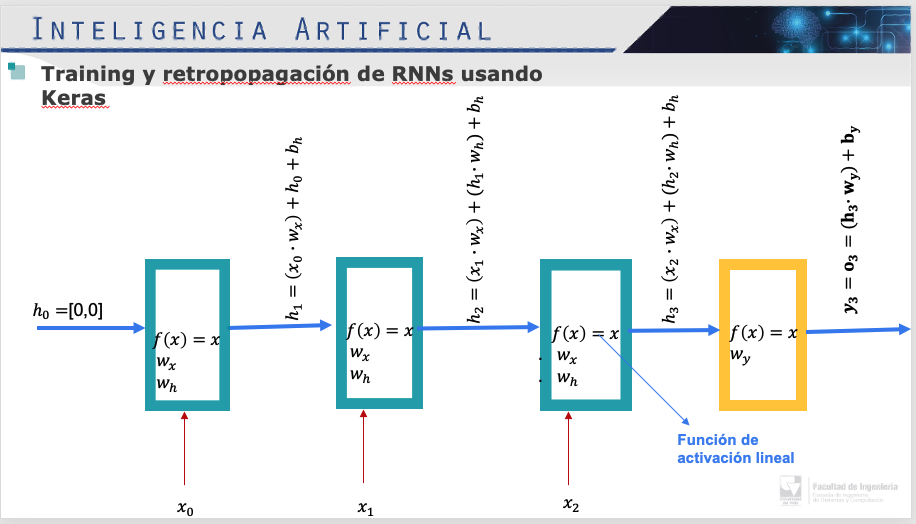

In [ ]:

x = np.array([1, 2, 3])
f=np.reshape(x,(1, 3, 1))
print(f)

[[[1]
  [2]
  [3]]]


In [ ]:

x = np.array([1, 2, 3])
# Redefinir la entrada a las características requeridas sample_size x time_steps x
x_input = np.reshape(x,(1, 3, 1))  # x_input es la entrada de testeo
y_pred_model = demo_model.predict(x_input) # esta es la prediccion del modelo hecho con SimpleRNN de keras
print(x,y_pred_model)
print(x_input)

m = 2
h0 = np.zeros(m)
h1 = np.dot(x[0], wx) + h0 + bh
h2 = np.dot(x[1], wx) + np.dot(h1,wh) + bh
h3 = np.dot(x[2], wx) + np.dot(h2,wh) + bh
o3 = np.dot(h3, wy) + by
print (h0)
print('h1 = ', h1,'h2 = ', h2,'h3 = ', h3)

print("Predicción de la RNN ", y_pred_model)
print("Predicción de nuestro computo ", o3)
print("La funcion de perdida", abs(y_pred_model-o3))

1/1 [==============================] - 0s 182ms/step
[1 2 3] [[-1.6863375]]
[[[1]
  [2]
  [3]]]
[0. 0.]
h1 =  [[ 0.25516212 -1.00090671]] h2 =  [[ 1.11217359 -1.16234972]] h3 =  [[ 0.93933969 -1.40341966]]
Predicción de la RNN  [[-1.6863375]]
Predicción de nuestro computo  [[-1.68633744]]
La funcion de perdida [[3.38000552e-08]]
